In [107]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import glob
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import matplotlib.pyplot as plt
import seaborn as sns
import os
for filepath in glob.glob("*.csv"):
    print(filepath)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

test.csv
train.csv
gender_submission.csv


In [108]:
#let's read the files in
training_data = pd.read_csv('./train.csv')
test_data = pd.read_csv('./test.csv')

training_data['train_or_test'] = 1
test_data['train_or_test'] = 0

#test data is missing the survived column so initialize one
test_data['Survived'] = np.nan

all_data = pd.concat([training_data, test_data])

all_data.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_or_test'],
      dtype='object')

In [109]:
#what does the data look like, shapes sizes etc.
training_data.info()
#age and cabin columns seem to have a lot of null values..

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Name           891 non-null    object 
 4   Sex            891 non-null    object 
 5   Age            714 non-null    float64
 6   SibSp          891 non-null    int64  
 7   Parch          891 non-null    int64  
 8   Ticket         891 non-null    object 
 9   Fare           891 non-null    float64
 10  Cabin          204 non-null    object 
 11  Embarked       889 non-null    object 
 12  train_or_test  891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [110]:
training_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_or_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [111]:
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_or_test
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [112]:
#segregating numeric columns
training_data.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'train_or_test'],
      dtype='object')

In [113]:
#numeric and  categorical to separate dataframes

df_numeric = training_data[['Age','SibSp','Parch', 'Fare']]
df_categories = training_data[['Survived', 'Pclass','Sex','Ticket','Cabin','Embarked']]

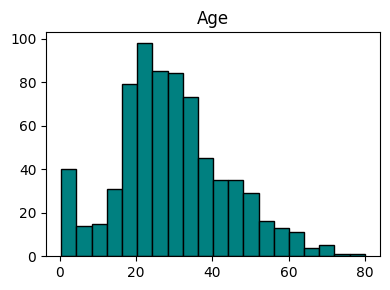

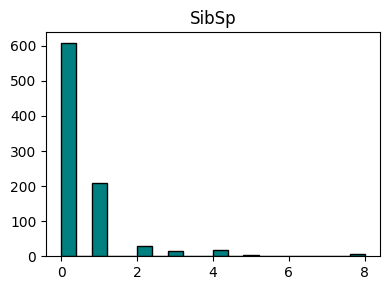

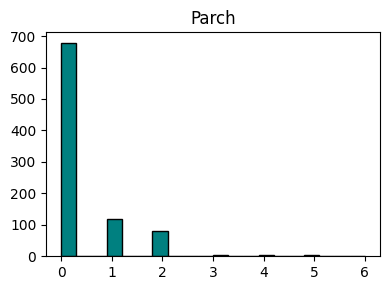

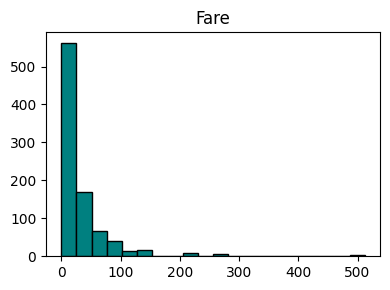

In [114]:
#plot the numericals as histograms
for col in df_numeric:
    plt.figure(figsize=(4, 3))  # width=4 inches, height=3 inches (smaller than default)
    plt.hist(df_numeric[col], bins=20, color='#008080', edgecolor='black')  # optional styling
    plt.title(col)
    plt.tight_layout()  # avoids overlapping labels
    plt.show()


            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<Axes: >

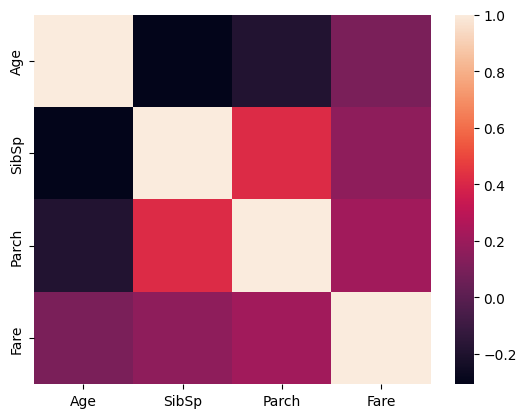

In [115]:
#AGE is very normal, but some of these columns need normalization and scaling later downstream
#what are some correlations in between numerical data

print(df_numeric.corr())
sns.heatmap(df_numeric.corr())

in regression, we want to avoid multicollinearity i.e. 2 variables with v high correlation as taht impacts the model

In [116]:
#compare survival rate across age, sibsp, parch etc
"""
This function aggregates data based on some key(s) (index) and calculates summary statistics for other columns (values).

By default, the aggregation function is mean if you don’t specify aggfunc.
"""

pd.pivot_table(training_data, index = 'Survived', values = ['Age','SibSp','Parch', 'Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


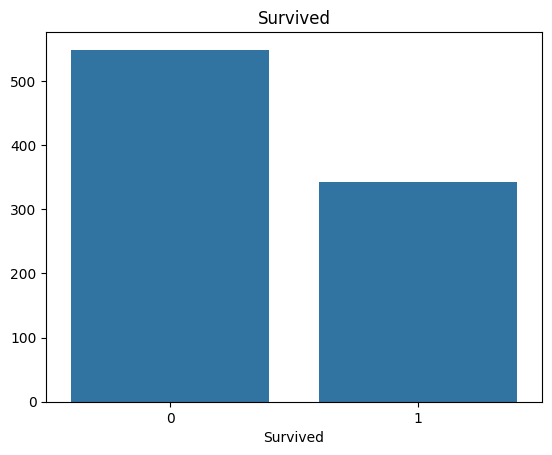

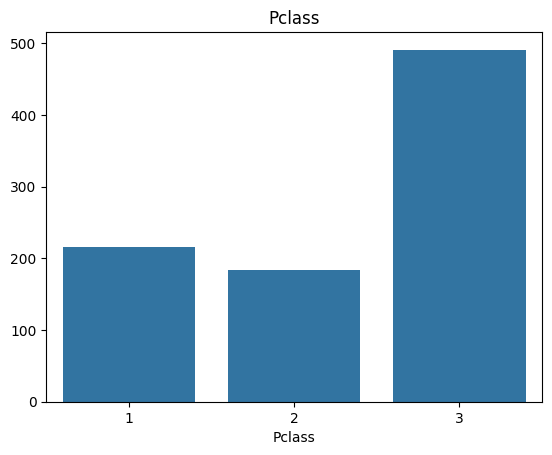

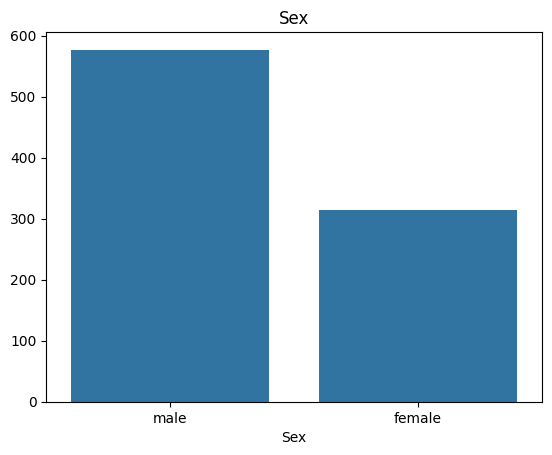

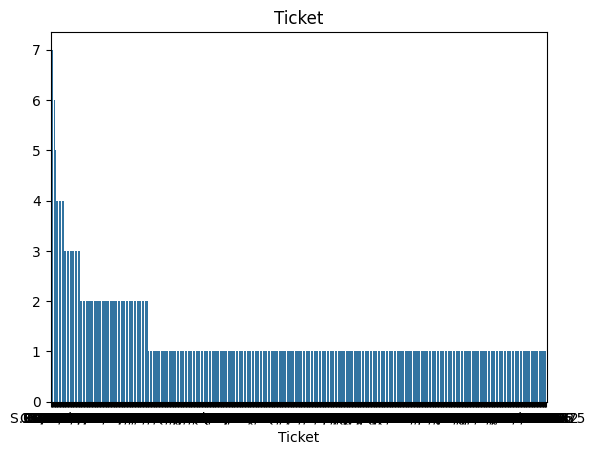

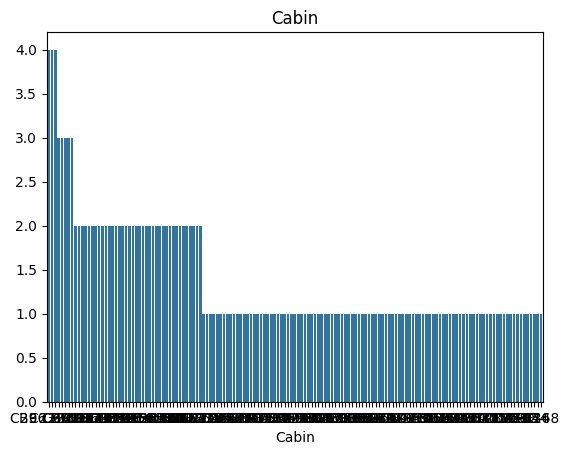

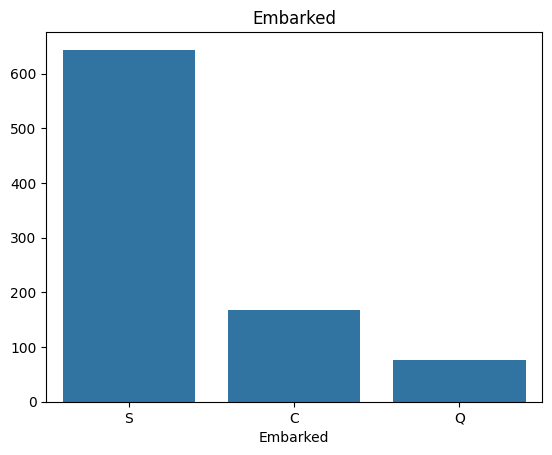

In [117]:
#looking at the categorical data
for column in df_categories.columns:
    counts = df_categories[column].value_counts()
    sns.barplot(x=counts.index, y=counts.values)  # <-- use x= and y=
    plt.title(column)
    plt.show()
    

In [118]:
#comparing survival for each of the categories

print(pd.pivot_table(training_data, index = 'Survived', columns = 'Pclass', values = 'Ticket', aggfunc = 'count'))

'''
index='Survived' → rows will be split by survival (0 or 1).
columns='Pclass' → columns will be split by passenger class (1, 2, 3).
values='Ticket' + aggfunc='count' → count how many tickets (i.e., passengers) fall into each (Survived, Pclass) combination.'''
print()
print(pd.pivot_table(training_data, index = 'Survived', columns = 'Sex', values = 'Ticket', aggfunc = 'count'))
print()
print(pd.pivot_table(training_data, index = 'Survived', columns = 'Embarked', values = 'Ticket', aggfunc = 'count'))



Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


In [119]:
#feature engineering!

#simplify cabin data. o multiple or differnet cabins impact the chances of survival?
#mine the counts of each cabin type and how many people had 0, 1 2 or more

df_categories.Cabin[80:90]

80            NaN
81            NaN
82            NaN
83            NaN
84            NaN
85            NaN
86            NaN
87            NaN
88    C23 C25 C27
89            NaN
Name: Cabin, dtype: object

In [120]:
print()
'''
pd.isna(x) checks if x is NaN (missing). 
if not null, find out how many cabins and assign that number to each row in the cabin_multiple column
'''
training_data['cabin_multiple'] = training_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
print(training_data['cabin_multiple'][85:90])
print()
print(training_data['cabin_multiple'].value_counts())


85    0
86    0
87    0
88    3
89    0
Name: cabin_multiple, dtype: int64

cabin_multiple
0    687
1    180
2     16
3      6
4      2
Name: count, dtype: int64


In [121]:
#survival rate based on num of cabins
#values='Ticket' is just the placeholder column for counting done by the aggfunc.
print(pd.pivot_table(training_data, index = 'Survived', columns = 'cabin_multiple', values = 'Ticket', aggfunc = 'count'))

cabin_multiple      0      1    2    3    4
Survived                                   
0               481.0   58.0  7.0  3.0  NaN
1               206.0  122.0  9.0  3.0  2.0


In [122]:
#craete categories based on cabin letters
#pick first letter 
training_data['cabin_letter'] = training_data.Cabin.apply(lambda x: str(x)[0])

print(training_data['cabin_letter'].value_counts())

#n here means N/A and can be used as a category or feature of its own
#now look at teh survival rate vs cabin location on Titanic
print(pd.pivot_table(training_data, index = 'Survived', columns = 'cabin_letter', values = 'Ticket', aggfunc = 'count'))

cabin_letter
n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64
cabin_letter    A     B     C     D     E    F    G    T      n
Survived                                                       
0             8.0  12.0  24.0   8.0   8.0  5.0  2.0  1.0  481.0
1             7.0  35.0  35.0  25.0  24.0  8.0  2.0  NaN  206.0


In [123]:
#understanding the ticket values better, some are numebric smome alphanumeric
training_data['Ticket']

0               A/5 21171
1                PC 17599
2        STON/O2. 3101282
3                  113803
4                  373450
5                  330877
6                   17463
7                  349909
8                  347742
9                  237736
10                PP 9549
11                 113783
12              A/5. 2151
13                 347082
14                 350406
15                 248706
16                 382652
17                 244373
18                 345763
19                   2649
20                 239865
21                 248698
22                 330923
23                 113788
24                 349909
25                 347077
26                   2631
27                  19950
28                 330959
29                 349216
30               PC 17601
31               PC 17569
32                 335677
33             C.A. 24579
34               PC 17604
35                 113789
36                   2677
37             A./5. 2152
38          

****
Capturing ticket prefixes
Many Titanic passengers’ tickets had prefixes like "A/5", "STON/O2.", "C.A.", etc.
These prefixes often encode information about the passenger class, embarkation point, or booking group.

For example:

"STON/O2." → usually third-class tickets from Southampton
"PC" → usually first-class “Passenger Cabin” tickets

The numeric part of the ticket (like 21171) is often unique to each passenger.
If you included the number in the feature, it would create thousands of almost-unique categories, which doesn’t help a model generalize.
By keeping only the prefix letters, you reduce it to meaningful categories.


Once you have ticket_letters, you can:
Encode it as a categorical feature for machine learning (one-hot encoding or label encoding).
Analyze survival trends based on ticket groups: some prefixes may have higher survival rates due to class, group booking, or location on the ship.


In [124]:
training_data['is_numeric_ticket'] = training_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)

ticket_letters_list = []

for ticket in training_data.Ticket:
    if not ticket.isnumeric():
        # split and take all but last part
        components = ticket.split(' ')[:-1]
        # clean each component and join
        cleaned = ''.join(c.replace('.', '').replace('/', '').lower() for c in components)
        #we make a list for now, convert it to a dataframe column later
        ticket_letters_list.append(cleaned)
    else:
        ticket_letters_list.append(0)

# assign to new column
training_data['ticket_letters'] = ticket_letters_list

print(training_data['ticket_letters'][45:49])   
#training_data['ticket_letter_info'] = training_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)

45    sca4
46       0
47       0
48       0
Name: ticket_letters, dtype: object


In [125]:
training_data['is_numeric_ticket'].value_counts()

#Usually standard tickets, often 3rd class, may indicate less special treatment

is_numeric_ticket
1    661
0    230
Name: count, dtype: int64

In [126]:
#lets us view all rows in dataframe through scrolling. This is for convenience 
#pd.set_option("max_rows", None)
pd.set_option("display.max_rows", None)

#viewing the counts of each letter sets we extracted 
training_data['ticket_letters'].value_counts().head(5)

ticket_letters
0         661
pc         60
ca         41
a5         21
stono2     18
Name: count, dtype: int64

In [127]:
#differences in surviva rate between numeric and alphanumeric ticket types
print(pd.pivot_table(training_data, index = 'Survived', columns = 'ticket_letters', values = 'Ticket', aggfunc = 'count'))

ticket_letters      0        a4    a5   as    c    ca  casoton   fa   fc  ...  \
Survived                                                                  ...   
0               407.0  3.0  7.0  19.0  1.0  3.0  27.0      1.0  1.0  1.0  ...   
1               254.0  1.0  NaN   2.0  NaN  2.0  14.0      NaN  NaN  NaN  ...   

ticket_letters  soc  sop  sopp  sotono2  sotonoq   sp  stono2  swpp   wc  wep  
Survived                                                                       
0               5.0  1.0   3.0      2.0     13.0  1.0    10.0   NaN  9.0  2.0  
1               1.0  NaN   NaN      NaN      2.0  NaN     8.0   2.0  1.0  1.0  

[2 rows x 30 columns]


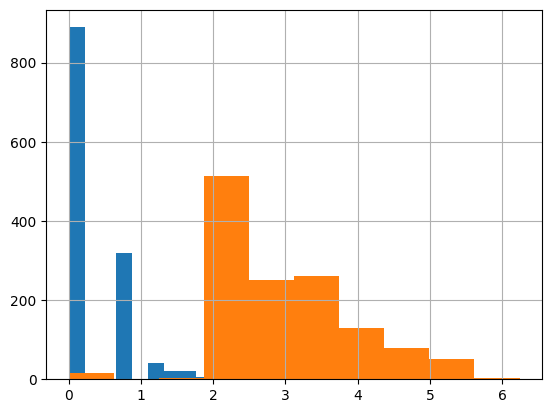

In [128]:
#create all categorical variables
all_data['cabin_multiple'] = all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))

all_data['cabin_adv'] = all_data.Cabin.apply(lambda x: str(x)[0] )
#print(all_data['cabin_adv'])
'''
The first letter of the cabin indicates the deck (A, B, C, D, etc.).
Deck location correlated with class and survival rates.'''

all_data['is_numeric'] = all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)

all_data['ticket_letters'] = all_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
all_data['name_title'] = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

#impute nulls for continuous data 
#all_data.Age = all_data.Age.fillna(training_data.Age.mean())
all_data.Age = all_data.Age.fillna(training_data.Age.median())
#all_data.Fare = all_data.Fare.fillna(training_data.Fare.mean())
all_data.Fare = all_data.Fare.fillna(training_data.Fare.median())

#drop null 'embarked' rows. Only 2 instances of this in training and 0 in test 
all_data.dropna(subset=['Embarked'],inplace = True)

#tried log norm of sibsp (not used)
all_data['norm_sibsp'] = np.log(all_data.SibSp+1)
all_data['norm_sibsp'].hist()

# log norm of fare (used)
all_data['norm_fare'] = np.log(all_data.Fare+1)
all_data['norm_fare'].hist()

# converted fare to category for pd.get_dummies()
all_data.Pclass = all_data.Pclass.astype(str)

#created dummy variables from categories (also can use OneHotEncoder)
'''
How it works: get_dummies (will do one hot encoding of categorical data)
It creates one column per category.
Each row gets a 1 in the column that matches its category, and 0 elsewhere.
'''
all_dummies = pd.get_dummies(all_data[['Pclass','Sex','Age','SibSp','Parch','norm_fare','Embarked','cabin_adv','cabin_multiple','is_numeric','name_title','train_or_test']])

In [129]:
all_dummies.head(5)

,Age,SibSp,Parch,norm_fare,cabin_multiple,is_numeric,train_or_test,Pclass_1,Pclass_2,Pclass_3,...,name_title_Master,name_title_Miss,name_title_Mlle,name_title_Mme,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Rev,name_title_Sir,name_title_the Countess
0,22.0,1,0,2.110213,0,0,1,False,False,True,...,False,False,False,False,True,False,False,False,False,False
1,38.0,1,0,4.280593,1,0,1,True,False,False,...,False,False,False,False,False,True,False,False,False,False
2,26.0,0,0,2.188856,0,0,1,False,False,True,...,False,True,False,False,False,False,False,False,False,False
3,35.0,1,0,3.990834,1,1,1,True,False,False,...,False,False,False,False,False,True,False,False,False,False
4,35.0,0,0,2.202765,0,1,1,False,False,True,...,False,False,False,False,True,False,False,False,False,False


In [130]:
X_train = all_dummies[all_dummies.train_or_test == 1].drop(['train_or_test'], axis =1)
# ==1 is training, ==0 is test data
#drop Removes the column train_or_test from those rows. axis=1 means drop a column (instead of a row).
X_test = all_dummies[all_dummies.train_or_test == 0].drop(['train_or_test'], axis =1)

#predictions output for trainig
y_train = all_data[all_data.train_or_test == 1].Survived
y_train.shape

(889,)

In [131]:
#scale the data

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

#StandardScaler transforms numeric features so they have: mean = 0, standard deviation = 1
#This makes features comparable in scale (important for algorithms like logistic regression, SVM, neural nets).
#z= (x−μ​)/σ​


all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['Age','SibSp','Parch','norm_fare']]= scale.fit_transform(all_dummies_scaled[['Age','SibSp','Parch','norm_fare']])
#Applies scaling only to continuous/numeric features: Age SibSp (# of siblings/spouses aboard) Parch (# of parents/children aboard) norm_fare (normalized ticket fare)
print(all_dummies_scaled[['Age','SibSp','Parch','norm_fare']].head(2))

X_train_scaled = all_dummies_scaled[all_dummies_scaled.train_or_test == 1].drop(['train_or_test'], axis =1)
X_test_scaled = all_dummies_scaled[all_dummies_scaled.train_or_test == 0].drop(['train_or_test'], axis =1)

y_train = all_data[all_data.train_or_test==1].Survived 

        Age     SibSp     Parch  norm_fare
0 -0.580261  0.480272 -0.445407  -0.896331
1  0.662297  0.480272 -0.445407   1.347870


We would assess the predictions form diff models. sOme of them are:
Naive Bayes (%)
Logistic Regression (%)
Decision Tree (%)
K Nearest Neighbor (%)
Random Forest (%)
Support Vector Classifier (%)
Xtreme Gradient Boosting (%)
Soft Voting Classifier - All Models (%)


In [132]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

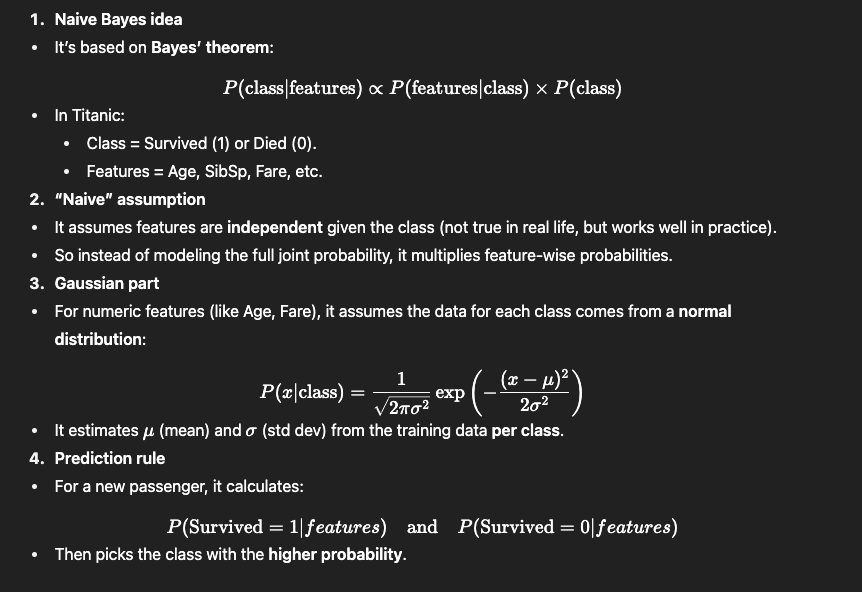

In [135]:
#Naive Bayes: Assumes features follow a normal (Gaussian) distribution within each class.


gaussian_nb_model = GaussianNB()

"""cross_val_score does cross-validation:
Splits the training data (X_train, y_train) into cv=6 folds.
Trains the model on 5 folds and tests it on the 6th, repeating 6 times.
Returns an array of scores (one per fold).
By default, the score is accuracy. The “loss” in cross-validation here is simply how often it guessed right vs wrong (accuracy).
"""
cvscore = cross_val_score(gaussian_nb_model, X_train_scaled, y_train, cv =6)
print(cvscore)
print(cvscore.mean())

[0.65100671 0.68243243 0.75675676 0.77027027 0.76351351 0.74324324]
0.7278704879376021


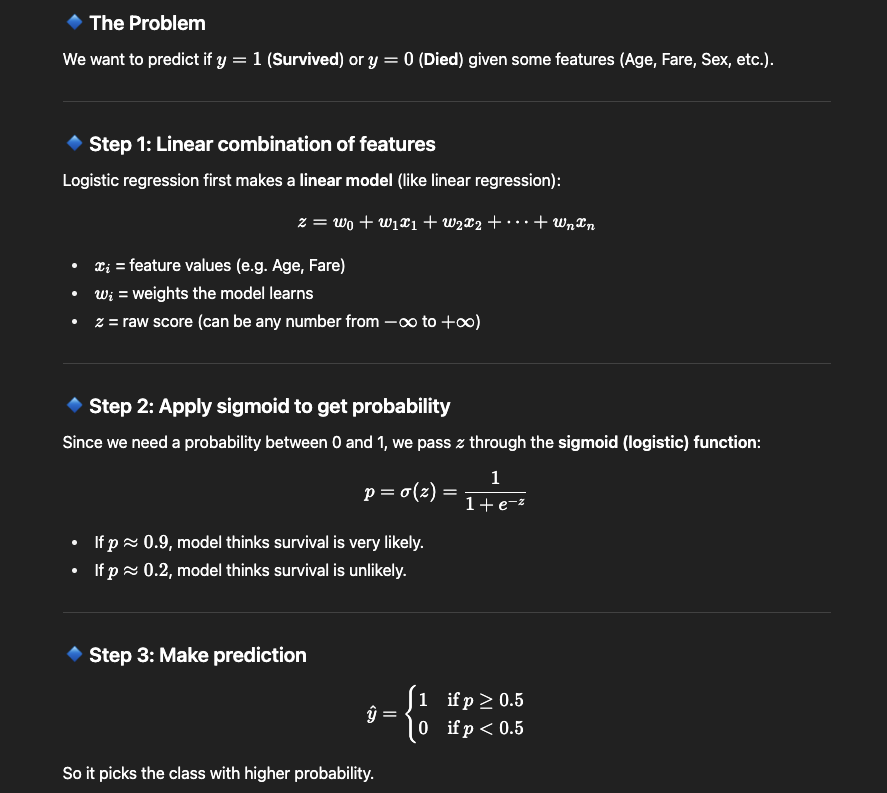

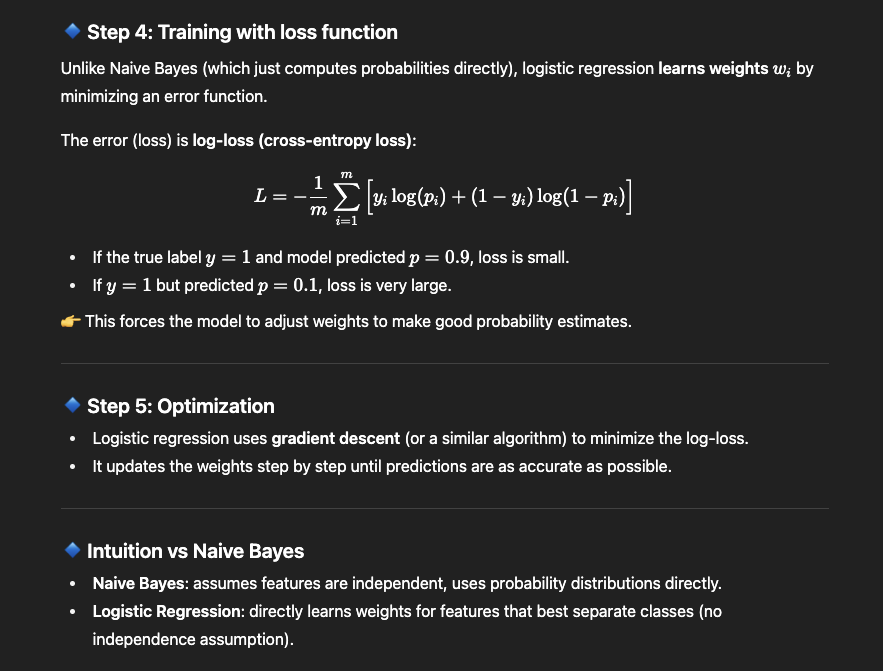

In [138]:
#logistic regression

lr_model = LogisticRegression(max_iter=1500)
cv_lr = cross_val_score(lr_model, X_train,y_train, cv =6 )
print(cv_lr)
print(cv_lr.mean())

[0.79865772 0.82432432 0.85135135 0.79054054 0.81756757 0.85135135]
0.8222988088759902


In [140]:
#logistic regression with scaled x data

lr_model = LogisticRegression(max_iter=1500)
cv_lr = cross_val_score(lr_model, X_train_scaled,y_train, cv =6 )
print(cv_lr)
print(cv_lr.mean())

[0.79865772 0.82432432 0.85135135 0.79054054 0.81756757 0.85810811]
0.8234249350021162


In [147]:
dtree_model = tree.DecisionTreeClassifier(random_state = 3)
cv_dtree = cross_val_score(dtree_model,X_train,y_train,cv=6)
print(cv_dtree)
print(cv_dtree.mean())

[0.7114094  0.76351351 0.80405405 0.77027027 0.80405405 0.81081081]
0.7773520164459762


In [148]:
dtree_model_2 = tree.DecisionTreeClassifier(random_state = 3)
cv_dtree_scaled = cross_val_score(dtree_model,X_train_scaled,y_train,cv=6)
print(cv_dtree_scaled)
print(cv_dtree_scaled.mean())

[0.71812081 0.75675676 0.81081081 0.77027027 0.80405405 0.81756757]
0.7795967108047644


In [149]:
knn_model = KNeighborsClassifier()
cv_knn = cross_val_score(knn_model,X_train,y_train,cv=6)
print(cv_knn)
print(cv_knn.mean())

[0.74496644 0.79054054 0.85135135 0.80405405 0.78378378 0.87162162]
0.807719632384062


In [ ]:

knn_model2 = KNeighborsClassifier()
cv_knn = cross_val_score(knn_model2,X_train_scaled,y_train,cv=6)
print(cv_knn)
print(cv_knn.mean())